In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data exploration and analysis preparation

#### Reading the data and converting them into a Dataframe 

In [19]:
# Load all dataframes (using data_loader module)

from data_loader import load_dataset as load_all

other_road_users, sensors = load_all()
print('Loaded', len(other_road_users), 'other dataframes and', len(sensors), 'sensors dataframes')
print('Sample other_road_users keys:', list(other_road_users.keys())[:10])
print('Sample sensors keys:', list(sensors.keys())[:10])

Loaded 12 other dataframes and 12 sensors dataframes
Sample other_road_users keys: ['ebike_subject_a', 'ebike_subject_b', 'escooter_subject_b', 'escooter_subject_c', 'ebike_subject_e', 'escooter_subject_e', 'ebike_subject_g', 'escooter_subject_g', 'ebike_subject_h', 'escooter_subject_h']
Sample sensors keys: ['ebike_subject_a', 'ebike_subject_b', 'escooter_subject_b', 'escooter_subject_c', 'ebike_subject_e', 'escooter_subject_e', 'ebike_subject_g', 'escooter_subject_g', 'ebike_subject_h', 'escooter_subject_h']


In [20]:
# See the columns of other_road_users dataframes

other_road_users['ebike_subject_a'].columns

Index(['frame_index', 'track_id', 'class_name', 'angle', 'distance', 'x', 'y',
       'x_inter', 'y_inter', 'x_inter_rts', 'y_inter_rts', 'vx_rts', 'vy_rts',
       'interpolated', 'corrected_class'],
      dtype='object')

In [21]:
# See the columns of sensors dataframes

sensors['ebike_subject_a'].columns

Index(['timestamp', 'cts_gopro', 'date_gopro', 'GPS (Lat.) [deg]',
       'GPS (Long.) [deg]', 'GPS (Alt.) [m]', 'GPS (2D speed) [m/s]',
       'precision', 'cts_gyro', 'date_gyro', 'Gyroscope (z) [rad/s]',
       'Gyroscope (x) [rad/s]', 'Gyroscope (y) [rad/s]', 'cts_acc', 'date_acc',
       'Accelerometer (z) [m/s²]', 'Accelerometer (x) [m/s²]',
       'Accelerometer (y) [m/s²]', 'Accelerometer (x) Filtered [m/s²]',
       'Accelerometer (y) Filtered [m/s²]',
       'Accelerometer (z) Filtered [m/s²]', 'Filtered velocity [m/s]',
       'bearing', 'frame_index'],
      dtype='object')

#### Pre-processing of the data

In [22]:
# See the number of missing data in the dataframes

for key in other_road_users:
    print(f"other_road_users['{key}'] missing data:\n", other_road_users[key].isna().sum())
for key in sensors:
    print(f"sensors['{key}'] missing data:\n", sensors[key].isna().sum())

other_road_users['ebike_subject_a'] missing data:
 frame_index          0
track_id             0
class_name         218
angle              218
distance           218
x                  218
y                  218
x_inter              0
y_inter              0
x_inter_rts          0
y_inter_rts          0
vx_rts               0
vy_rts               0
interpolated         0
corrected_class      0
dtype: int64
other_road_users['ebike_subject_b'] missing data:
 frame_index          0
track_id             0
class_name         716
angle              716
distance           716
x                  716
y                  716
x_inter              0
y_inter              0
x_inter_rts          0
y_inter_rts          0
vx_rts               0
vy_rts               0
interpolated         0
corrected_class      0
dtype: int64
other_road_users['escooter_subject_b'] missing data:
 frame_index          0
track_id             0
class_name         124
angle              124
distance           124
x            

In [23]:
# Remove all the missing data in all the dataframes

for key in other_road_users:
    other_road_users[key] = other_road_users[key].dropna()
for key in sensors:
    sensors[key] = sensors[key].dropna()


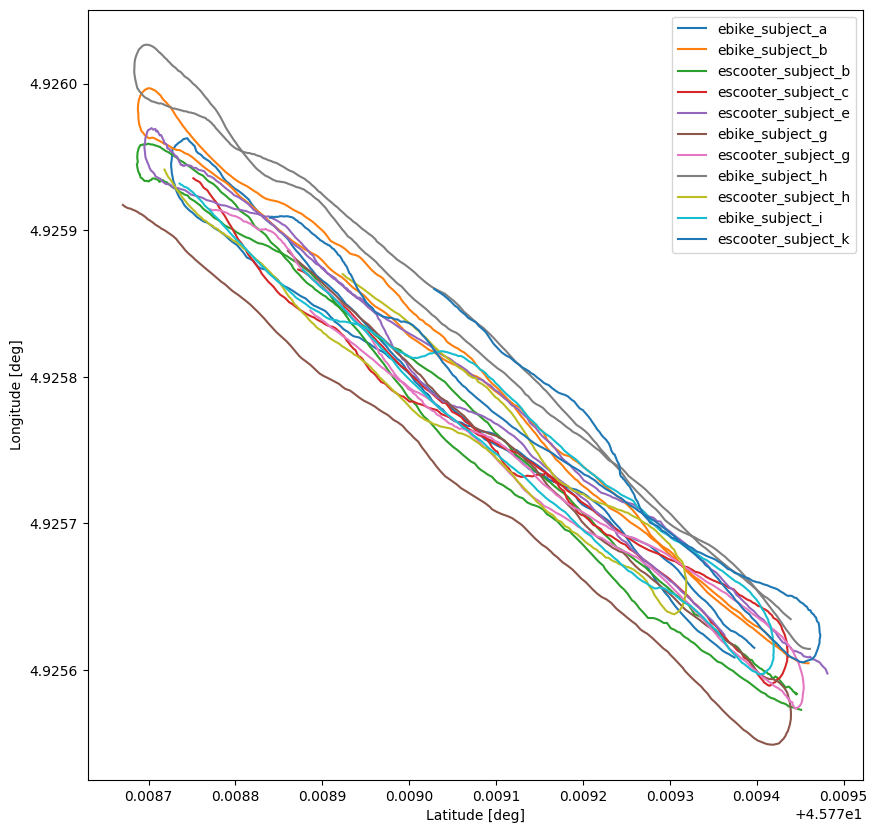

In [35]:
#### Plot all the trajectories for all the subjects on the same plot

plt.figure(figsize=(10, 10))
lat_col = 'GPS (Lat.) [deg]'
# use the correct longitude column name and allow for potential variants
lon_candidates = ['GPS (Long.) [deg]', 'GPS (Lon.) [deg]']

for key in sensors:
    df = sensors[key]
    if df.empty:
        continue
    lon_col = next((c for c in lon_candidates if c in df.columns), None)
    if lon_col is None or lat_col not in df.columns:
        print(f"Skipping {key}: required GPS columns not found")
        continue
    plt.plot(df[lat_col], df[lon_col], label=key)

plt.xlabel('Latitude [deg]')
plt.ylabel('Longitude [deg]')
plt.legend()
plt.show()